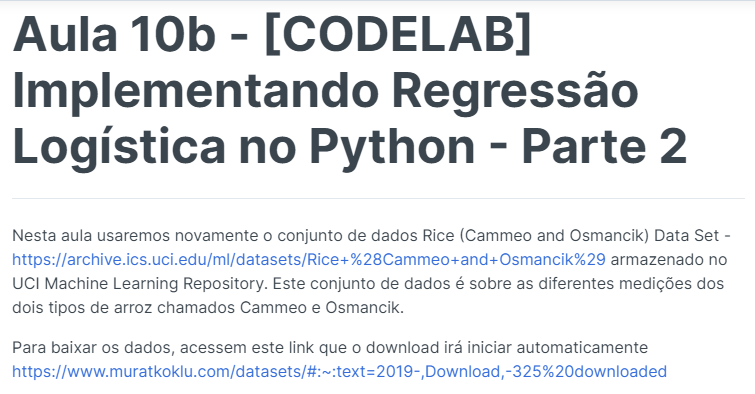

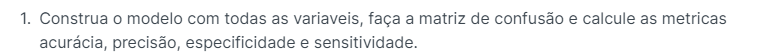


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
dados = pd.read_excel('Rice_Cammeo_Osmancik.xlsx')

dados = dados.sample(frac=1, random_state=10).reset_index(drop=True)

X = dados.drop('Class', axis = 1)
y = dados.Class

# Cammeo > classe negativa 
# Osmancik > Classe positiva

y = y.map({'Cammeo':0,
           'Osmancik':1}) 

X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(conf_matrix, 
             columns=["Predito Cammeo","Predito Osmancik",],
             index  =["Verdadeiro Cammeo", "Verdadeiro Osmancik"])

,Predito Cammeo,Predito Osmancik
Verdadeiro Cammeo,309,24
Verdadeiro Osmancik,29,400


In [ ]:
acuracia = accuracy_score(y_test,y_pred) 
precisao = precision_score(y_test,y_pred) 
especificidade = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
recall = recall_score(y_test,y_pred)

print(f'acurácia: {acuracia}')
print(f'precisão: {precisao}')
print(f'especificidade: {especificidade}')
print(f'sensitividade: {recall}')

acurácia: 0.9304461942257218
precisão: 0.9433962264150944
especificidade: 0.9279279279279279
sensitividade: 0.9324009324009324


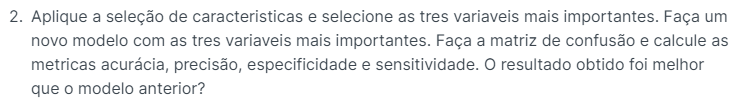

In [ ]:
seletor = RFE(LogisticRegression(),n_features_to_select = 3, step = 1).fit(X_std,y)
print(f"Variáveis mais importantes: {seletor.get_feature_names_out()}")

Variáveis mais importantes: ['Perimeter' 'Eccentricity' 'Convex_Area']


In [ ]:
X_std_selecionado = X_std[seletor.get_feature_names_out()] # Dataframe com as 3 mais importantes

X_train, X_test, y_train, y_test = train_test_split(X_std_selecionado, y, test_size = 0.2, random_state=10)

reg_log2 = LogisticRegression()
reg_log2.fit(X_train, y_train)
y_pred = reg_log2.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(conf_matrix, 
             columns=["Predito Cammeo","Predito Osmancik",],
             index  =["Verdadeiro Cammeo", "Verdadeiro Osmancik"])

,Predito Cammeo,Predito Osmancik
Verdadeiro Cammeo,309,24
Verdadeiro Osmancik,29,400


In [ ]:
acuracia = accuracy_score(y_test,y_pred) 
precisao = precision_score(y_test,y_pred) 
especificidade = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
recall = recall_score(y_test,y_pred)

print(f'acurácia: {acuracia}')
print(f'precisão: {precisao}')
print(f'especificidade: {especificidade}')
print(f'sensitividade: {recall}')

acurácia: 0.9304461942257218
precisão: 0.9433962264150944
especificidade: 0.9279279279279279
sensitividade: 0.9324009324009324


Não há grandes diferenças.

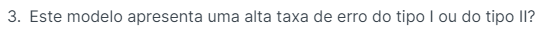

O modelo apresenta mais falsos negativos, ou seja, erro do tipo II